In [3]:
import nilearn.plotting as plotting
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import os
import second_level_functions as slf
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) #Filterout all the nilearn user warnings

Change name of task here then run

In [4]:
task = 'eft'
threshold_pval = -np.log10(0.05)

In [5]:
path = os.path.join(config(task), '2ndlevel', 'mixed_model')
save_results = os.path.join(config(task), '2ndlevel')

images = slf.get_images(path)
contrasts = slf.contrast_imgs(images['t_stat'], images['pvals'])

In [6]:
fmri_img_mask = slf.build_mask(contrasts['time']['pvals'], threshold_pval)

In [7]:
parameter_estimates = slf.extract_parameter_estimates(path, fmri_img_mask)

Plotting pvalues

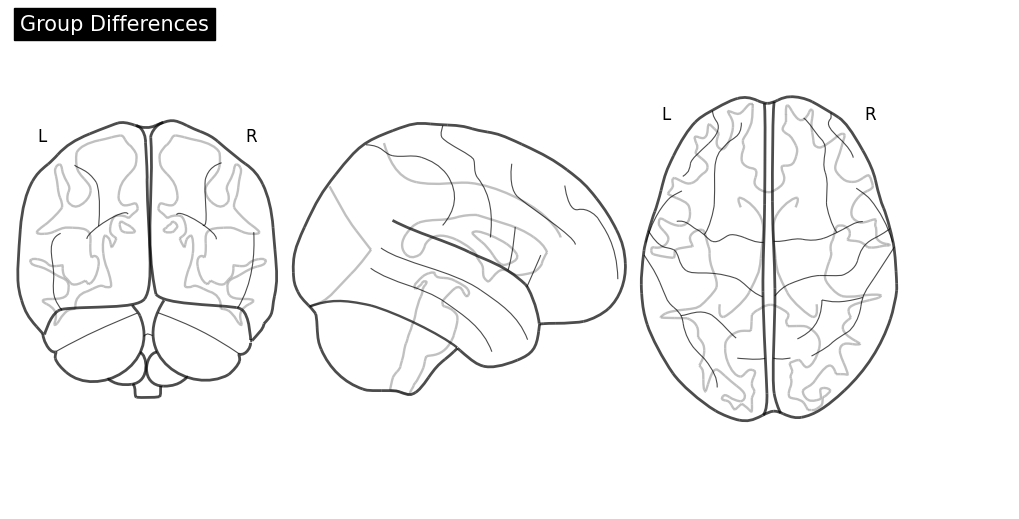

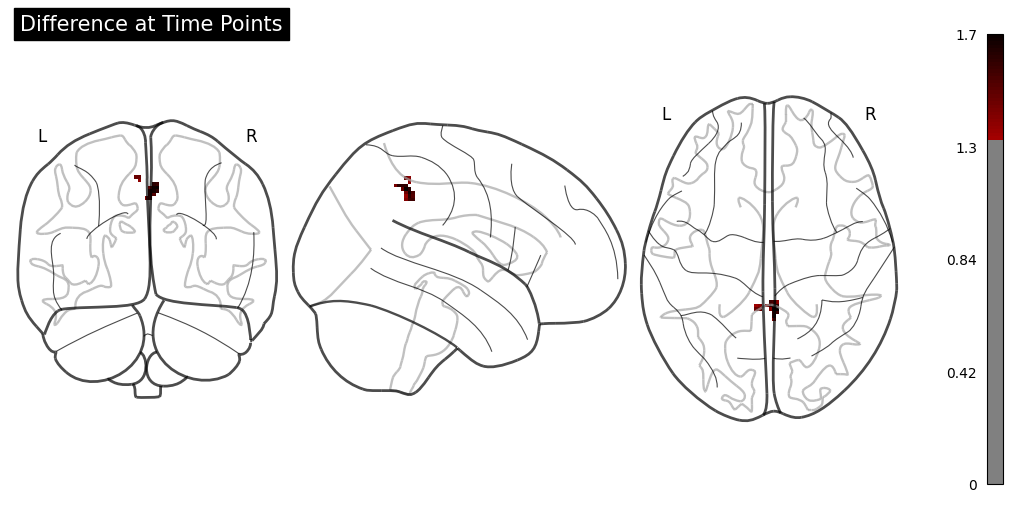

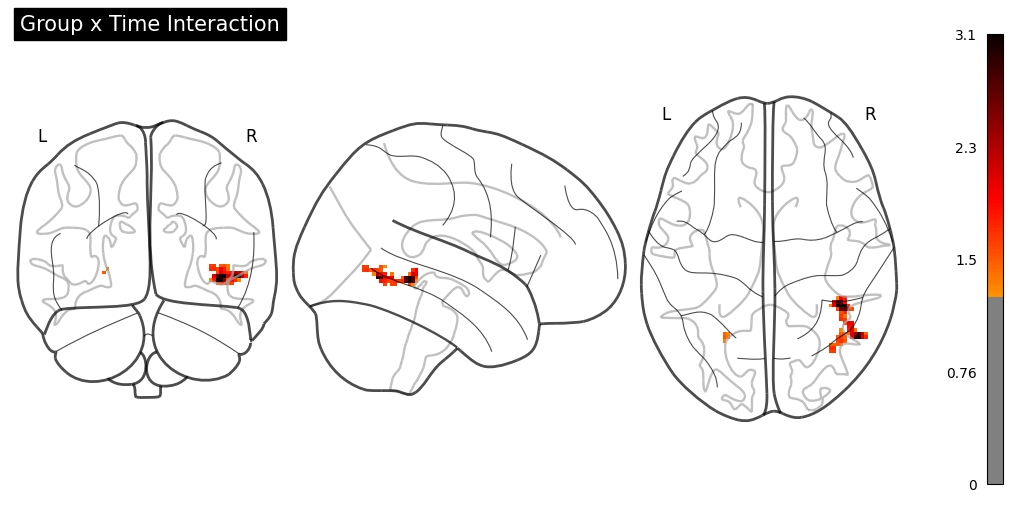

In [15]:
contrasts_list = [contrasts['group'], contrasts['time'], contrasts['interaction']]

for contrast in contrasts_list:
    fig = plt.figure(figsize=(10, 5))
    plotting.plot_glass_brain(contrast['pvals'], colorbar=True, plot_abs=False, 
                              figure=fig, title=contrast['graph_title'], threshold=threshold_pval)


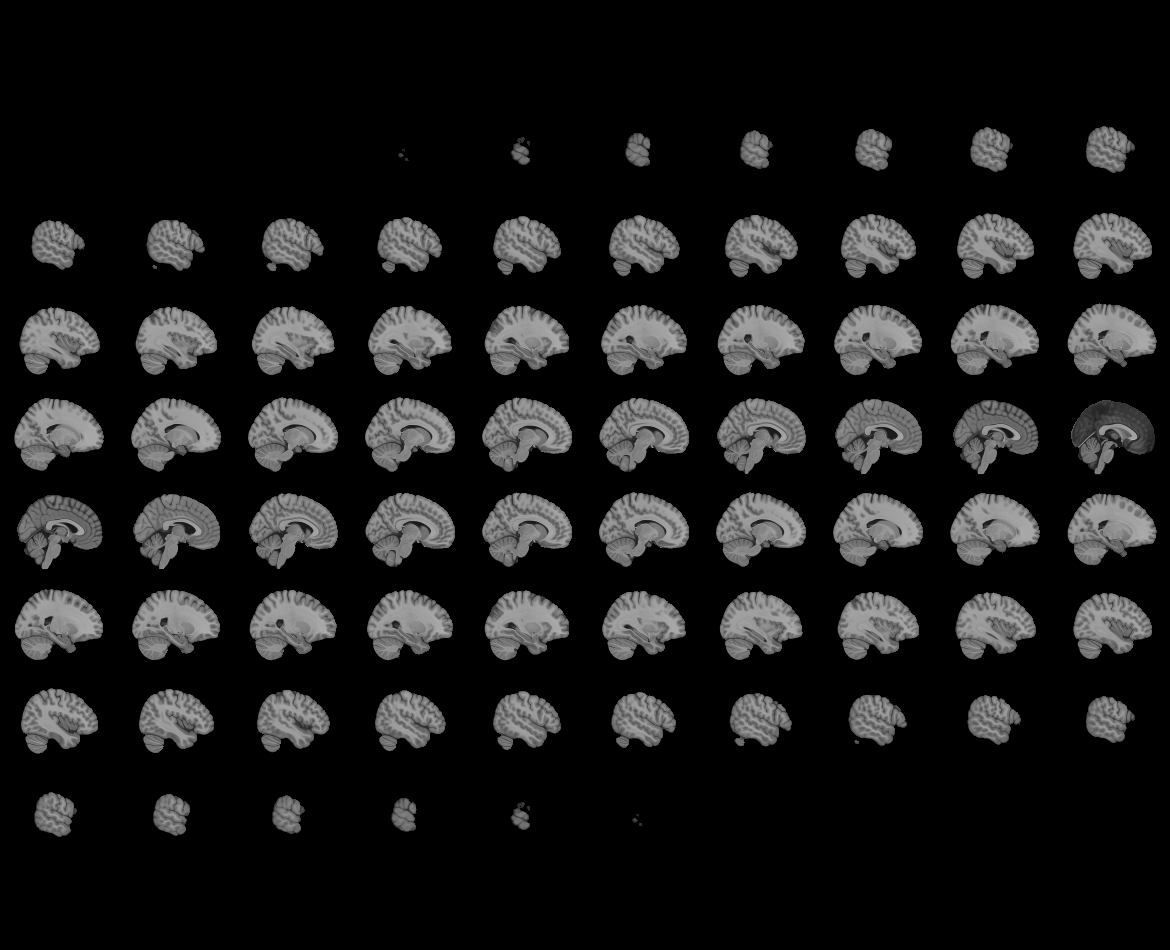
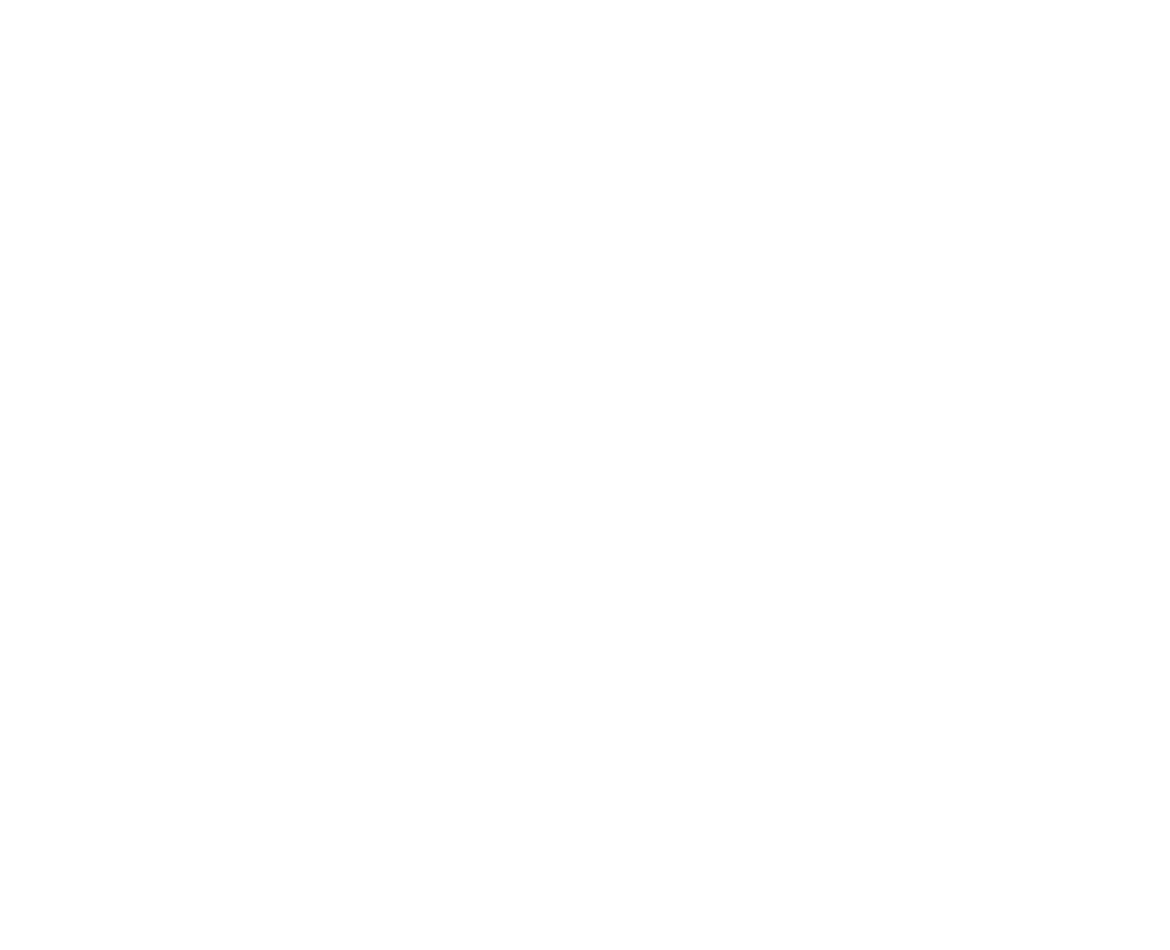

In [16]:
plotting.view_img(contrasts['group']['pvals'], threshold=threshold_pval)


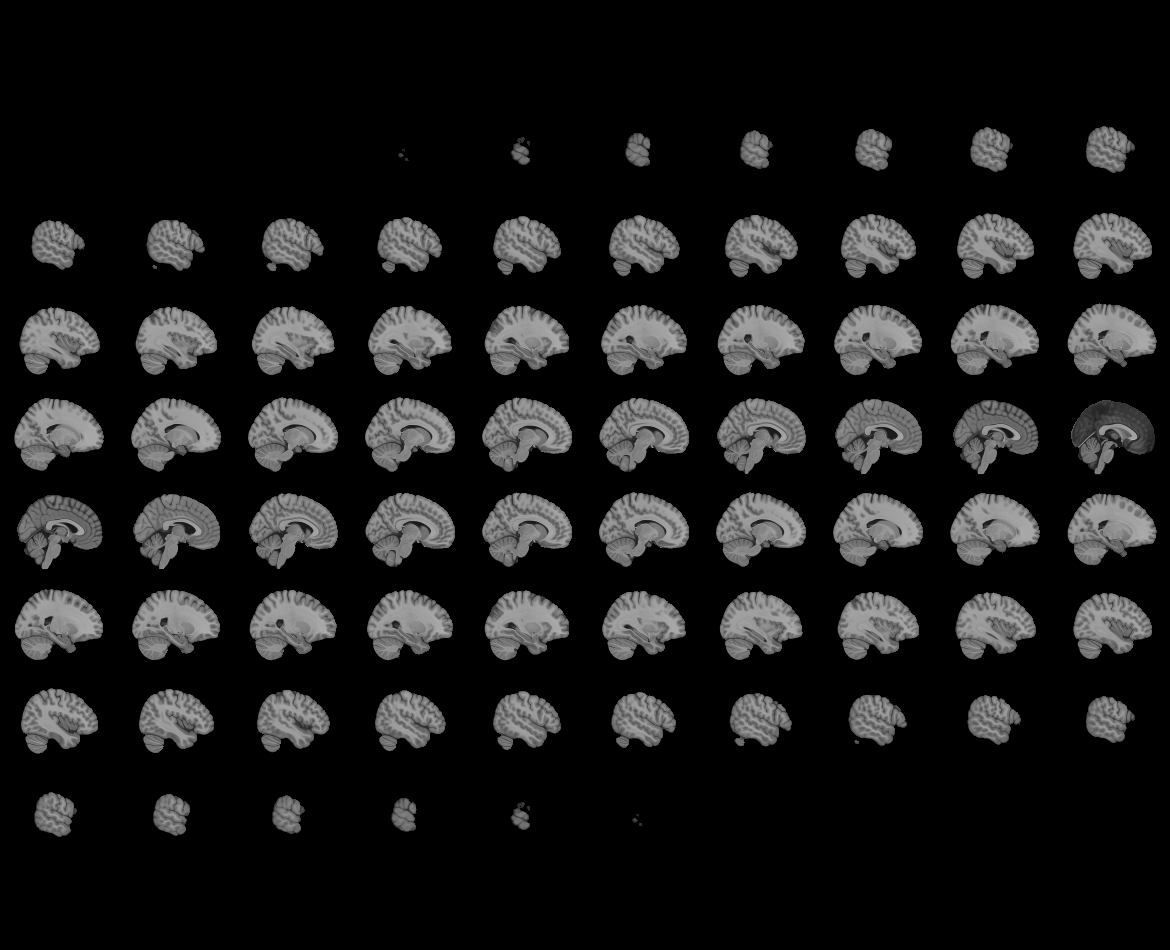
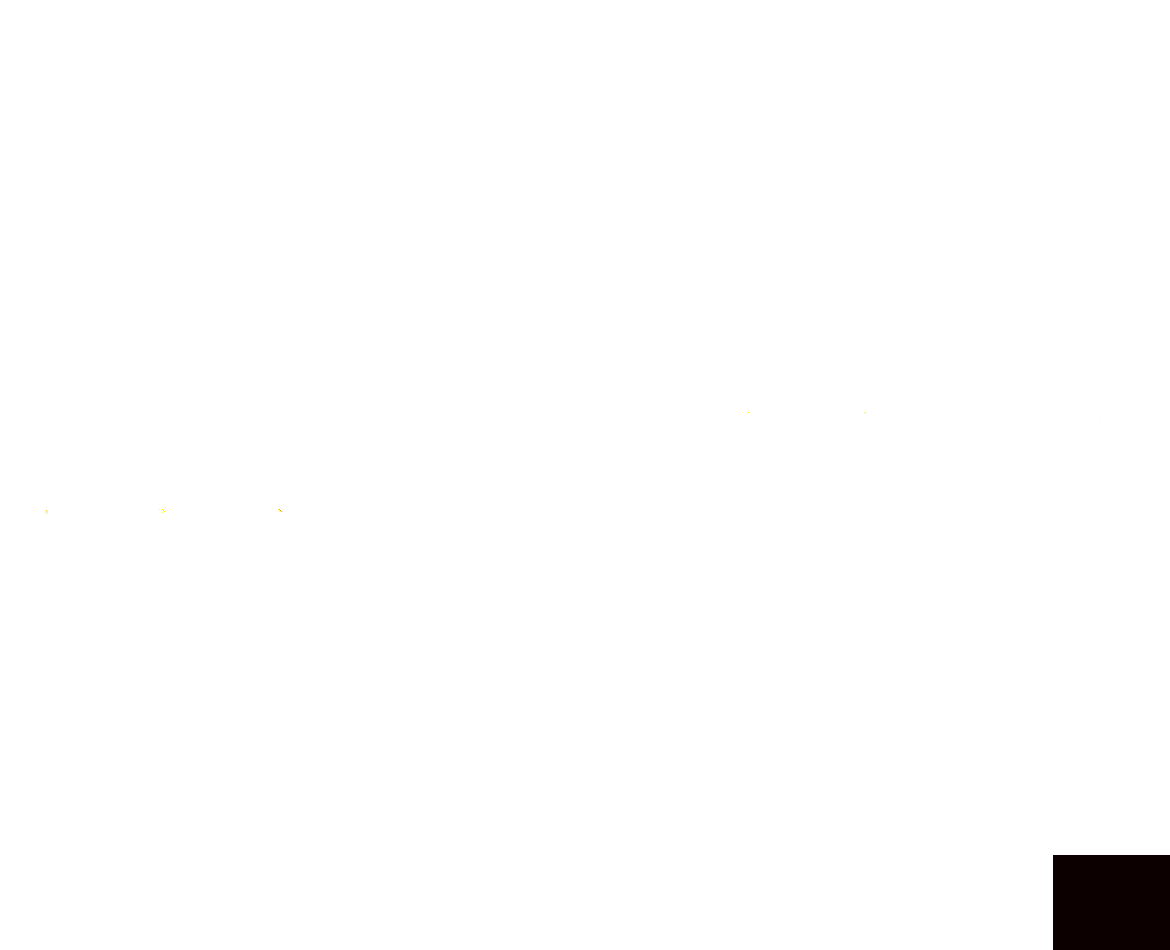

In [17]:
plotting.view_img(contrasts['time']['pvals'], threshold=threshold_pval)


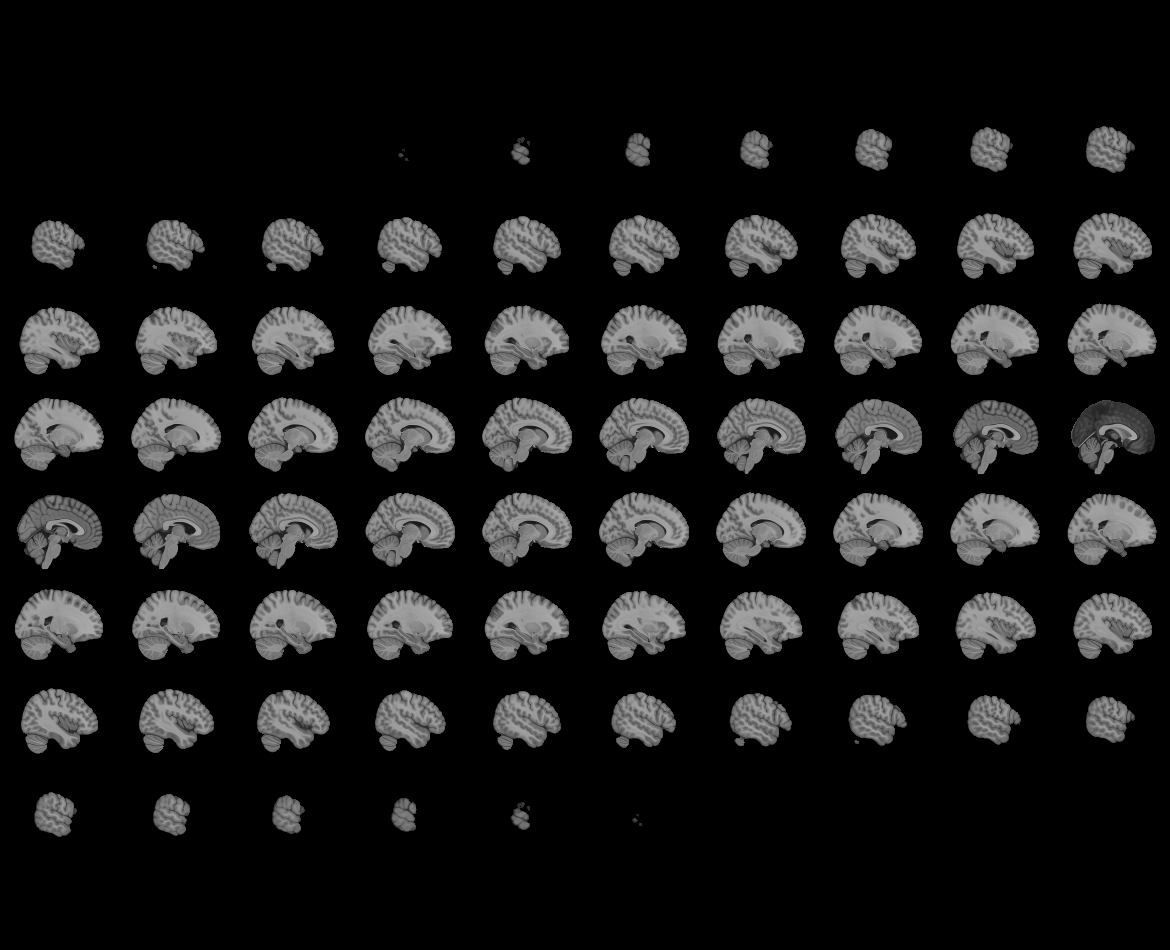
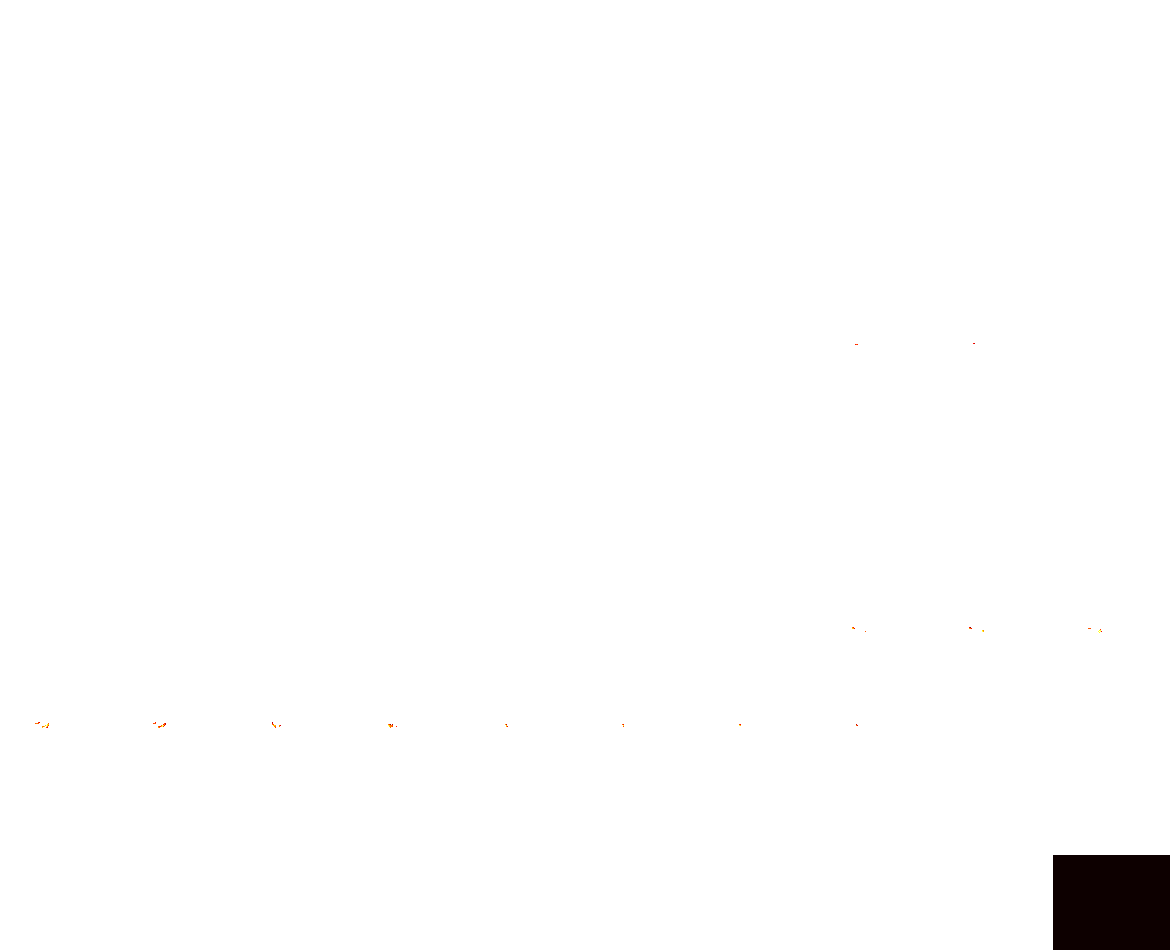

In [18]:
plotting.view_img(contrasts['interaction']['pvals'], threshold=threshold_pval)


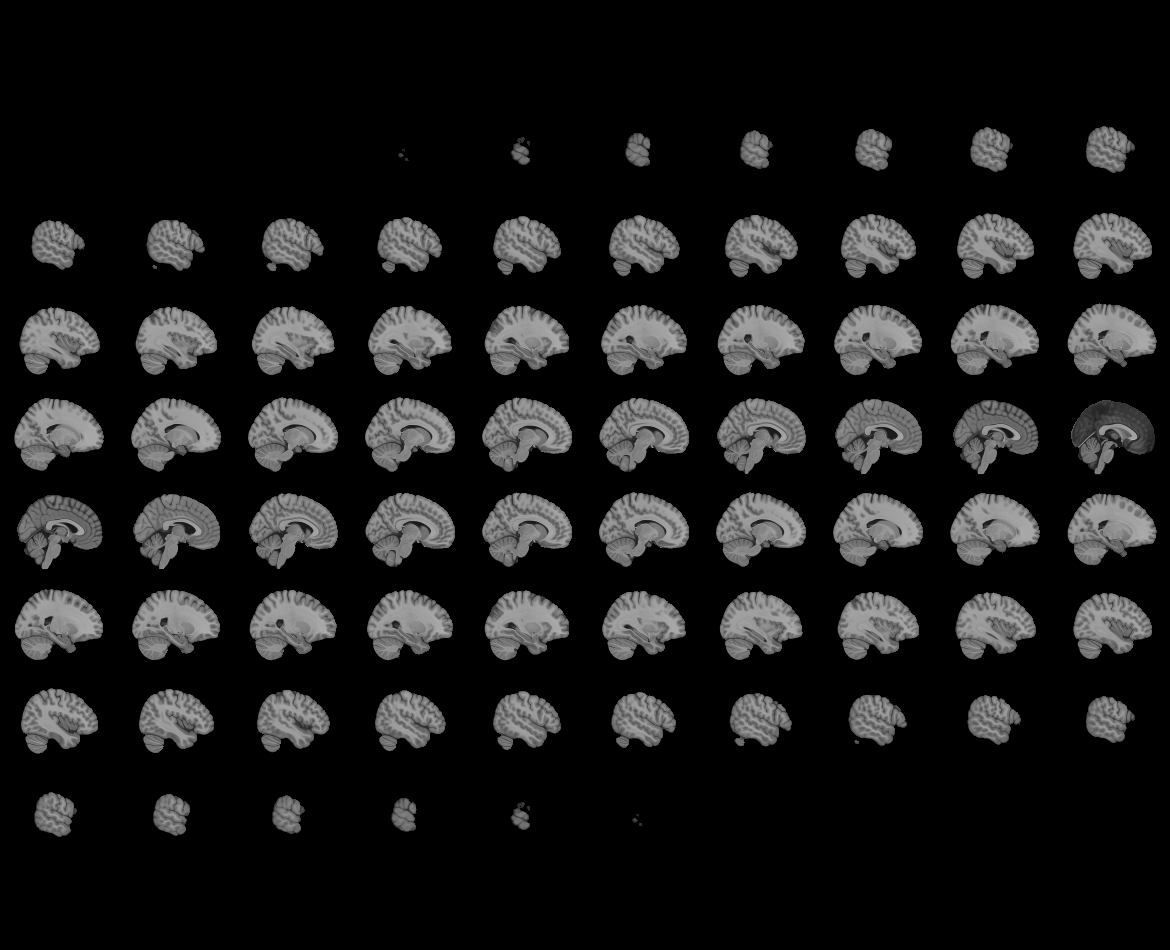
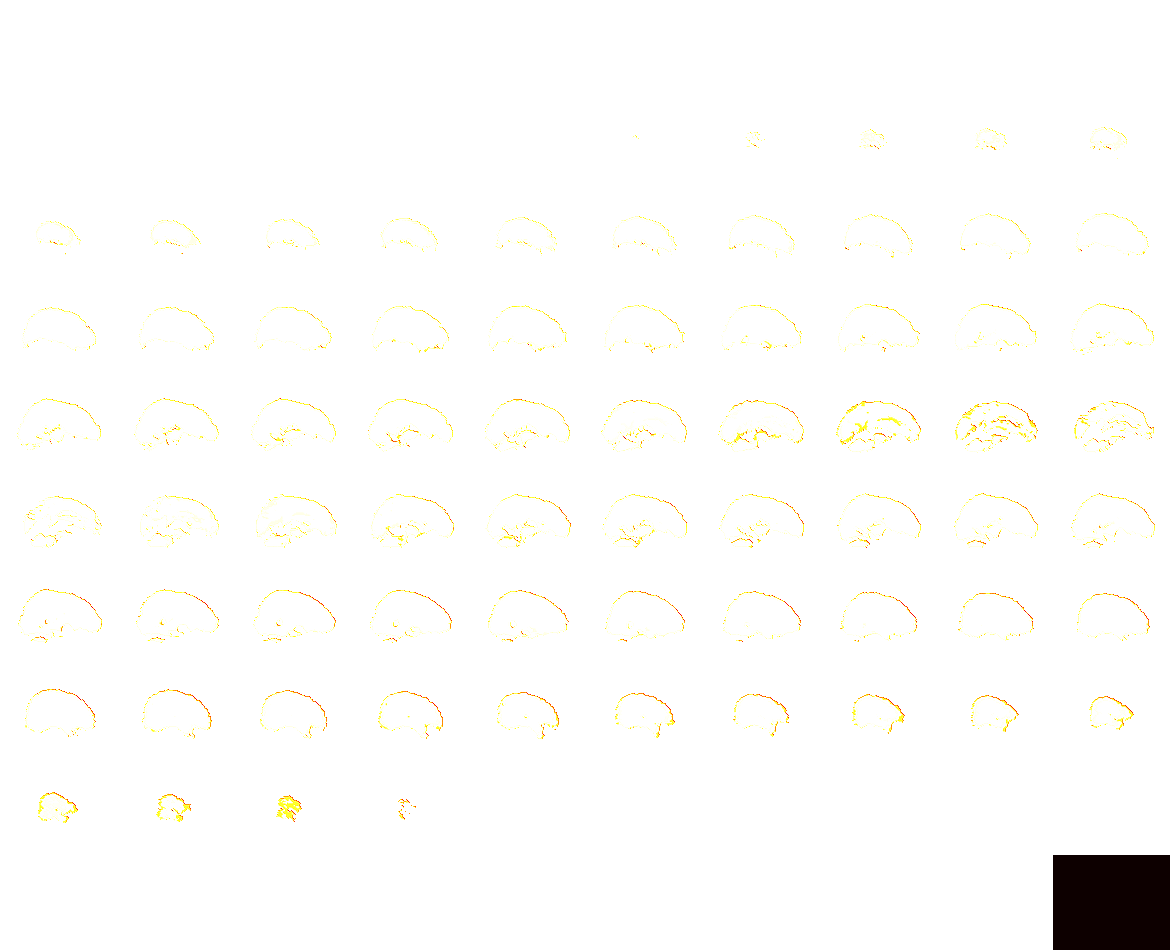

In [19]:
plotting.view_img(images['mask'])

In [20]:
group_clusters = slf.load_cluster_csv(save_results, 'group_clusters.csv')
group_clusters

No Significant Clusters


In [21]:
time_clusters = slf.load_cluster_csv(save_results, 'time_clusters.csv')
time_clusters

,cluster_id,peak_x,peak_y,peak_z,volume_mm,log10p,pval,region
0,1,5.5,-44.5,45.5,248,1.48329,0.032863,80.65% Right_Precuneous_Cortex; 16.13% Right_C...
1,2,-6.5,-44.5,51.5,40,1.37116,0.042544,100.00% Left_Precuneous_Cortex


In [22]:
interaction_clusters = slf.load_cluster_csv(save_results, 'interaction_clusters.csv')
interaction_clusters

,cluster_id,peak_x,peak_y,peak_z,volume_mm,log10p,pval,region
0,1,39.5,-42.5,-6.5,920,1.82487,0.014967,31.30% Right_Lateral_Occipital_Cortex_inferior...
1,2,-24.5,-60.5,-2.5,24,1.45883,0.034767,100.00% Left_Lingual_Gyrus
2,3,-22.5,-60.5,-0.5,16,1.35677,0.043977,100.00% Left_Lingual_Gyrus
